In [1]:
using DataFrames
using CSV

In [52]:
data=CSV.read("/Users/seansantellanes/Documents/RNN/us-epa-pm25-aqi.csv", DataFrame)

Row,DateTime,Average,LRAPA-Amazon Park A,LRAPA-Amazon Park B
,String31,Float64?,Int64,Int64
1,2024-06-23 15:00:00,7.8,4,5
2,2024-06-23 15:10:00,missing,3,4
3,2024-06-23 15:20:00,missing,3,4
4,2024-06-23 15:30:00,missing,3,3
5,2024-06-23 15:40:00,missing,1,2
6,2024-06-23 15:50:00,missing,1,1
7,2024-06-23 16:00:00,missing,2,2
8,2024-06-23 16:10:00,missing,1,2
9,2024-06-23 16:20:00,missing,1,1


In [53]:
data=data[!,[1,3,4]]

Row,DateTime,LRAPA-Amazon Park A,LRAPA-Amazon Park B
,String31,Int64,Int64
1,2024-06-23 15:00:00,4,5
2,2024-06-23 15:10:00,3,4
3,2024-06-23 15:20:00,3,4
4,2024-06-23 15:30:00,3,3
5,2024-06-23 15:40:00,1,2
6,2024-06-23 15:50:00,1,1
7,2024-06-23 16:00:00,2,2
8,2024-06-23 16:10:00,1,2
9,2024-06-23 16:20:00,1,1


In [54]:
using Statistics
data2=select(data, [2,3],
 AsTable([2,3]) => x
  -> (data[:,2]+data[:,3])/2)

Row,LRAPA-Amazon Park A,LRAPA-Amazon Park B,LRAPA-Amazon Park A_LRAPA-Amazon Park B_function
,Int64,Int64,Float64
1,4,5,4.5
2,3,4,3.5
3,3,4,3.5
4,3,3,3.0
5,1,2,1.5
6,1,1,1.0
7,2,2,2.0
8,1,2,1.5
9,1,1,1.0


In [55]:
tar_data=select(data2, Not(1,2))
tar_data=rename!(tar_data,[:a])

Row,a
,Float64
1,4.5
2,3.5
3,3.5
4,3.0
5,1.5
6,1.0
7,2.0
8,1.5
9,1.0


In [56]:
tar_vector=Vector{Float32}(tar_data[:,:a])

432-element Vector{Float32}:
 4.5
 3.5
 3.5
 3.0
 1.5
 1.0
 2.0
 1.5
 1.0
 1.0
 ⋮
 0.0
 0.5
 0.5
 0.0
 0.0
 0.5
 1.0
 1.0
 1.0

In [57]:
using Flux

In [58]:
function create_sequences(data, input_steps,output_steps)
    X, y = [], []
    for i in 1:(length(data) - input_steps - output_steps + 1)
        push!(X, data[i:i+input_steps-1])
        push!(y, data[i+input_steps+output_steps-1])
    end
    return hcat(X...), hcat(y...)
end

input_steps = 6
output_steps=6
X, y = create_sequences(tar_vector, input_steps,output_steps)

(Float32[4.5 3.5 … 0.5 1.5; 3.5 3.5 … 1.5 0.0; … ; 1.5 1.0 … 0.0 0.5; 1.0 2.0 … 0.5 0.5], Float32[1.0 1.0 … 1.0 1.0])

In [97]:
model = Chain(
    LSTM(input_steps, 50),
    LSTM(50,50),
    Dense(50, output_steps)
)

# Initialize the parameters
ps = Flux.params(model)

# Define the loss function and the optimizer
loss(x, y) = mean((model(x).-y).^2)
opt = ADAM(1e-2)

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [60]:
X

6×421 Matrix{Float32}:
 4.5  3.5  3.5  3.0  1.5  1.0  2.0  1.5  …  1.0  1.0  1.0  0.5  0.5  0.5  1.5
 3.5  3.5  3.0  1.5  1.0  2.0  1.5  1.0     1.0  1.0  0.5  0.5  0.5  1.5  0.0
 3.5  3.0  1.5  1.0  2.0  1.5  1.0  1.0     1.0  0.5  0.5  0.5  1.5  0.0  0.5
 3.0  1.5  1.0  2.0  1.5  1.0  1.0  1.0     0.5  0.5  0.5  1.5  0.0  0.5  0.0
 1.5  1.0  2.0  1.5  1.0  1.0  1.0  1.0     0.5  0.5  1.5  0.0  0.5  0.0  0.5
 1.0  2.0  1.5  1.0  1.0  1.0  1.0  1.0  …  0.5  1.5  0.0  0.5  0.0  0.5  0.5

In [61]:
x_batch=X[:,1:input_steps]

6×6 Matrix{Float32}:
 4.5  3.5  3.5  3.0  1.5  1.0
 3.5  3.5  3.0  1.5  1.0  2.0
 3.5  3.0  1.5  1.0  2.0  1.5
 3.0  1.5  1.0  2.0  1.5  1.0
 1.5  1.0  2.0  1.5  1.0  1.0
 1.0  2.0  1.5  1.0  1.0  1.0

In [81]:
model(x_batch)

6×6 Matrix{Float32}:
 1.90435  1.71006  1.60161  1.80004  1.87406  1.94905
 1.82884  1.88424  1.7738   2.0752   2.22365  2.41
 2.16899  2.28565  2.20465  2.49005  2.70198  2.89326
 2.68151  2.63101  2.5735   2.78235  2.86877  2.95961
 2.2437   2.62071  2.58997  2.87787  3.03336  3.29272
 2.89387  2.9646   2.82495  3.02049  3.04363  3.21858

In [62]:
z=rand(6,50)
s=rand(50,3)
t=rand(1,6)

1×6 Matrix{Float64}:
 0.00777909  0.178744  0.686556  0.913666  0.751438  0.757254

In [28]:
w=t*z*s

1×3 Matrix{Float64}:
 45.3126  37.0539  42.1938

In [101]:

ps=Flux.params(model)
batch_size=1
for epoch in 1:1000
    for i in 1:batch_size:(size(X, 1) - batch_size)
        x_batch = X[:,i:i+input_steps-1]
        y_batch = y[i:i+input_steps-1]
       
        gs = Flux.gradient(ps) do
            loss(x_batch, y_batch)
        end

        Flux.update!(opt, ps, gs)
    end
    if epoch%100==0
        println("Epoch: $epoch, Loss: $(loss(x_batch, y_batch))")
    end
end

Epoch: 100, Loss: 0.7592733
Epoch: 200, Loss: 1.0477438
Epoch: 300, Loss: 0.713708
Epoch: 400, Loss: 0.95464665
Epoch: 500, Loss: 1.09761
Epoch: 600, Loss: 1.1352005
Epoch: 700, Loss: 0.38879716
Epoch: 800, Loss: 0.38634282
Epoch: 900, Loss: 0.39003393
Epoch: 1000, Loss: 0.4333071


In [83]:
seq=X[:,end-input_steps+1:end]
seq[:,2:end]
#pred=model(seq)[end,:]

6×5 Matrix{Float32}:
 1.0  0.5  0.5  0.5  1.5
 0.5  0.5  0.5  1.5  0.0
 0.5  0.5  1.5  0.0  0.5
 0.5  1.5  0.0  0.5  0.0
 1.5  0.0  0.5  0.0  0.5
 0.0  0.5  0.0  0.5  0.5

In [99]:
function predict(model, data, input_steps, output_steps)
    seq = data[:,end-input_steps:end-1]
    preds = []
    for _ in 1:output_steps
        pred = model(seq)
        push!(preds, pred)
        seq = hcat(seq[:,2:end], pred[:,end])
        
    end
    return preds
end

predictions = predict(model, X, input_steps, output_steps)
predictions=predictions[end][end,:]

6-element Vector{Float32}:
 3.0882113
 2.820107
 3.0172832
 3.0074987
 2.7602558
 2.9256613

In [10]:
epochs = 1000
batch_size = seq_length

for epoch in 1:epochs
    
    for i in 1:batch_size:(size(X, 1) - batch_size)
        x_batch = X[i:i+batch_size-1, :]
        y_batch = y[i:i+batch_size-1]
       
        gs = Flux.gradient(ps) do
            loss(x_batch, y_batch)
        end

        Flux.update!(opt, ps, gs)
    end
    #println("Epoch $epoch: Loss = $(loss(X', y))")
end

UndefVarError: UndefVarError: `DataLoader` not defined

In [28]:
function predict(model, data, seq_length, num_predictions)
    input = data[end-seq_length+1:end,:]
    pred = model(input)


    return pred
end

predict (generic function with 1 method)

In [29]:

num_predictions = 6
predictions = predict(model, X, seq_length, num_predictions)
Float32.(predictions')

6×1 Matrix{Float32}:
 5.0401287
 4.0886536
 4.0433884
 5.907667
 6.952976
 4.0357056

In [78]:
using Dates
typeof(data."DateTime")
format = "yyyy-mm-dd HH:MM:SS"
dt=DateTime.(data."DateTime",format);

In [79]:
last_dt=dt[end]
for i in 1:output_steps
    last_dt+=Minute(10)
    push!(dt,last_dt)
end

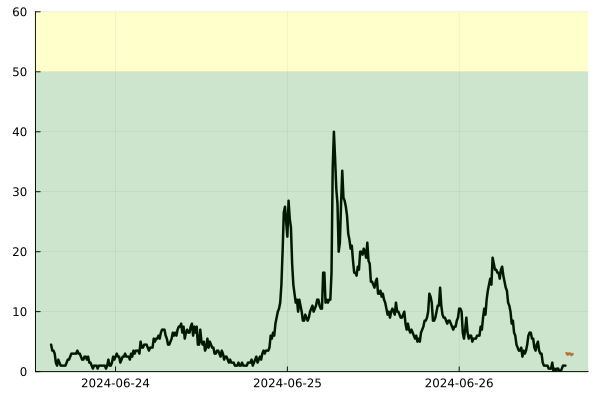

In [102]:
using Plots
predictions=convert(Vector{Float32},vec(predictions))
p=plot(dt[1:end-output_steps], tar_vector, label="Original Data",ylims=(0,60),color=:black,lw=2.5)
plot!(p,dt[end-output_steps+1:end], predictions, label="Predictions",lw=2.5)
hspan!(p,[0,50],color=:green,alpha=0.2)
hspan!(p,[50,100],color=:yellow,alpha=0.2,legend=false)